# Kaggle Machine Learning Intermediate

If you have some background in machine learning and you'd like to learn how to quickly improve the quality of your models, you're in the right place! In this micro-course, you will accelerate your machine learning expertise by learning how to:

- tackle data types often found in real-world datasets (**missing values, categorical variables**),
- design **pipelines** to improve the quality of your machine learning code,
- use advanced techniques for model validation (**cross-validation**),
- build state-of-the-art models that are widely used to win Kaggle competitions (**XGBoost**), and
- avoid common and important data science mistakes (**leakage**).

Along the way, you'll cement your knowledge by completing a hands-on exercise with real-world data for each new topic. The hands-on exercises use data from the Housing Prices Competition for Kaggle Learn Users, where you'll use 79 different explanatory variables (such as the type of roof, number of bedrooms, and number of bathrooms) to predict home prices. You'll measure your progress by submitting predictions to this competition and watching your position rise on the leaderboard!
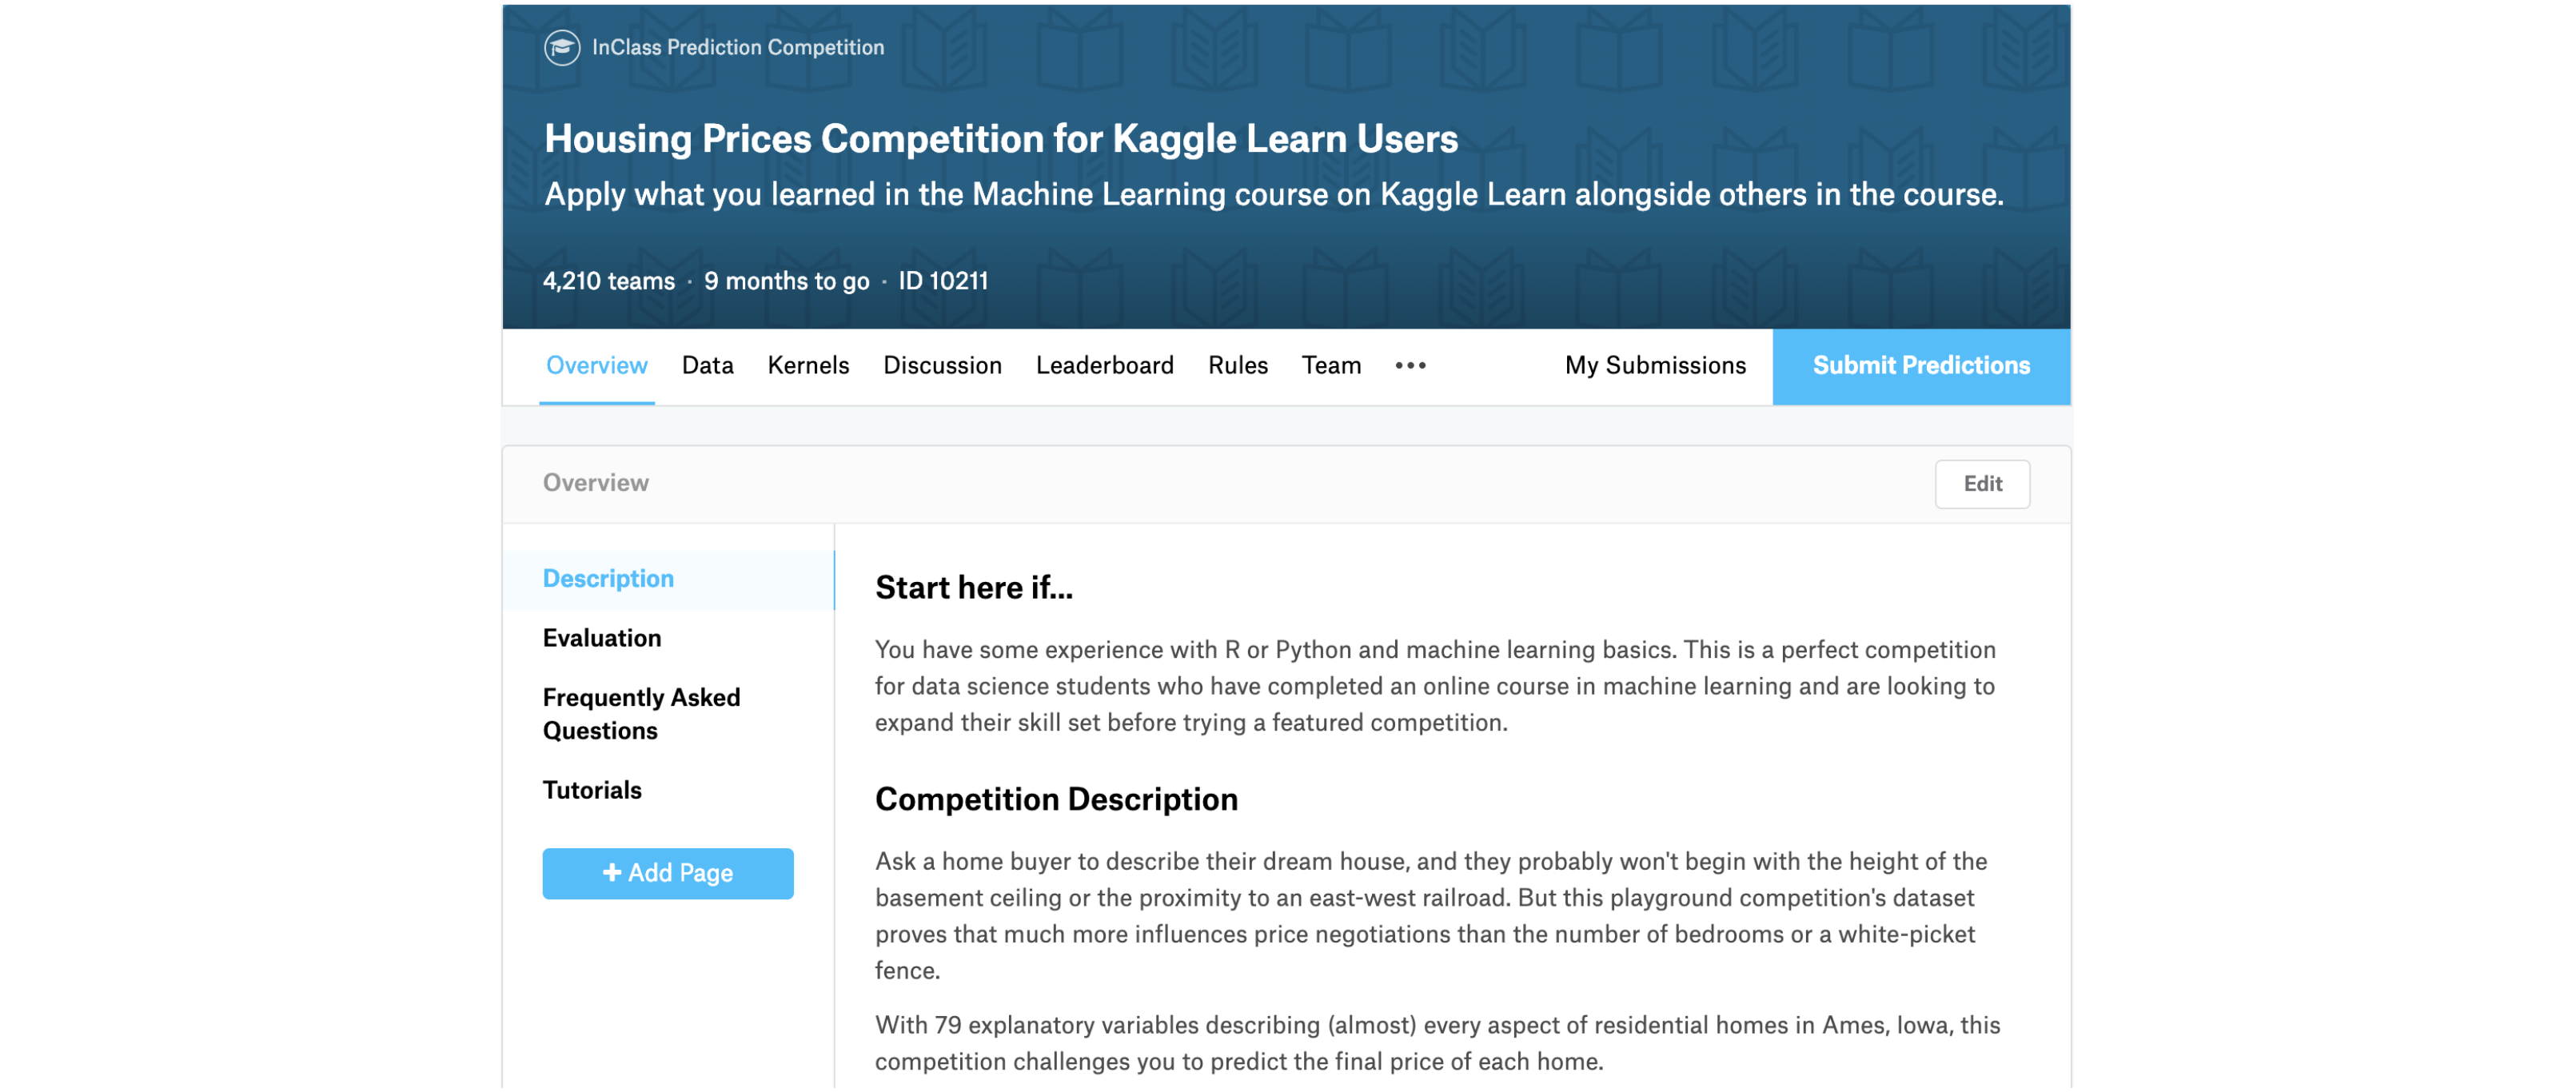

## Recap from the Intro Course

The Iowa housing Prices competition. We are going to predict the prices of the house using 79 explanatory variables (Almost every aspect of a house)

- load the train and test datasets provided and lets get started

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from math import *
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

In [2]:
train = pd.read_csv("Iowa_home_train.csv", index_col='Id')
test = pd.read_csv("Iowa_home_test.csv", index_col ='Id')

#Select features
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = train[features].copy() 
y = train.SalePrice

test_X = test[features].copy()



In [3]:
#split train data 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=42)

In [4]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
136,10400,1970,1682,0,2,3,7
1453,3675,2005,1072,0,1,2,5
763,8640,2009,764,783,2,3,7
933,11670,2006,1905,0,2,3,8
436,10667,1996,827,834,2,3,6


In [5]:
X_test.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
893,8414,1963,1068,0,1,3,6
1106,12256,1994,1500,1122,2,3,9
414,8960,1927,1028,0,1,2,5
523,5000,1947,1004,660,2,3,7
1037,12898,2007,1620,0,2,2,6


## Step 1: Evaluate several models
The next code cell defines five different random forest models.

In [6]:
# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=42)
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=42)
model_6 = RandomForestRegressor(n_estimators=70, max_depth=7, random_state=42)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=42)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)

models = [model_1, model_2, model_3, model_4, model_5, model_6]

To select the best model out of the five, we define a function **`score_model()`** below. This function returns the mean absolute error (**MAE**) from the validation set. Recall that the best model will obtain the lowest MAE.

In [7]:
def score_my_model(model, X_t=X_train,X_v= X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t,y_t)
    pred = model.predict(X_v)
    mae = mean_absolute_error(y_v, pred)
    return mae
for i in range(0,len(models)):
    my_mae = score_my_model(models[i])
    print("Model:%d\t\tMAE: %d" %(i+1, my_mae))

Model:1		MAE: 21702
Model:2		MAE: 21758
Model:3		MAE: 21853
Model:4		MAE: 21683
Model:5		MAE: 21792
Model:6		MAE: 21633


## Step 2: Generate test predictions

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name `my_model`.

In [8]:
#my_model will take the specifications of best performing model - Model 6
my_model = RandomForestRegressor(n_estimators=70, max_depth=70, random_state=42)

The code fits the model to the training and validation data, and then generates test predictions that are saved to a CSV file. These test predictions can be submitted directly to the competition!








In [9]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(test_X)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': test_X.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

## Dealing with missing values
In this tutorial, you will learn three approaches to **dealing with missing values**. Then you'll compare the effectiveness of these approaches on a real-world dataset.

## Introduction

There are many ways data can end up with missing values. For example,

- A 2 bedroom house won't include a value for the size of a third bedroom.
- A survey respondent may choose not to share his income.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. So you'll need to choose one of the strategies below.



### Three Approaches
- A Simple Option: Drop Columns with Missing Values

The simplest option is to drop columns with missing values.
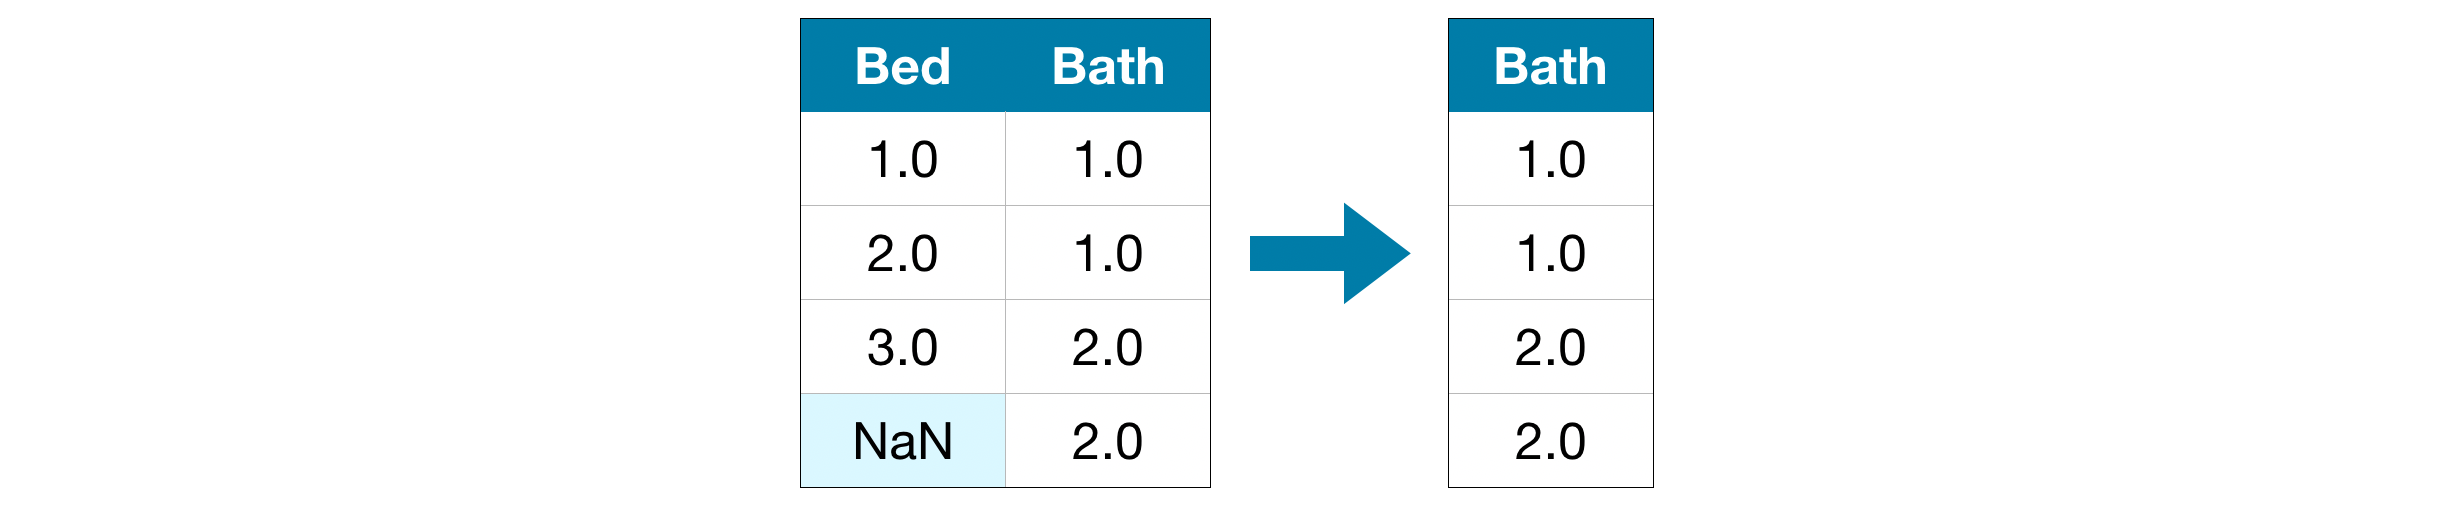

Unless most values in the dropped columns are missing, the model loses access to a lot of (potentially useful!) information with this approach. As an extreme example, consider a dataset with 10,000 rows, where one important column is missing a single entry. This approach would drop the column entirely!



- A Better Option: Imputation

**Imputation** fills in the missing values with some number. For instance, we can fill in the mean value along each column.
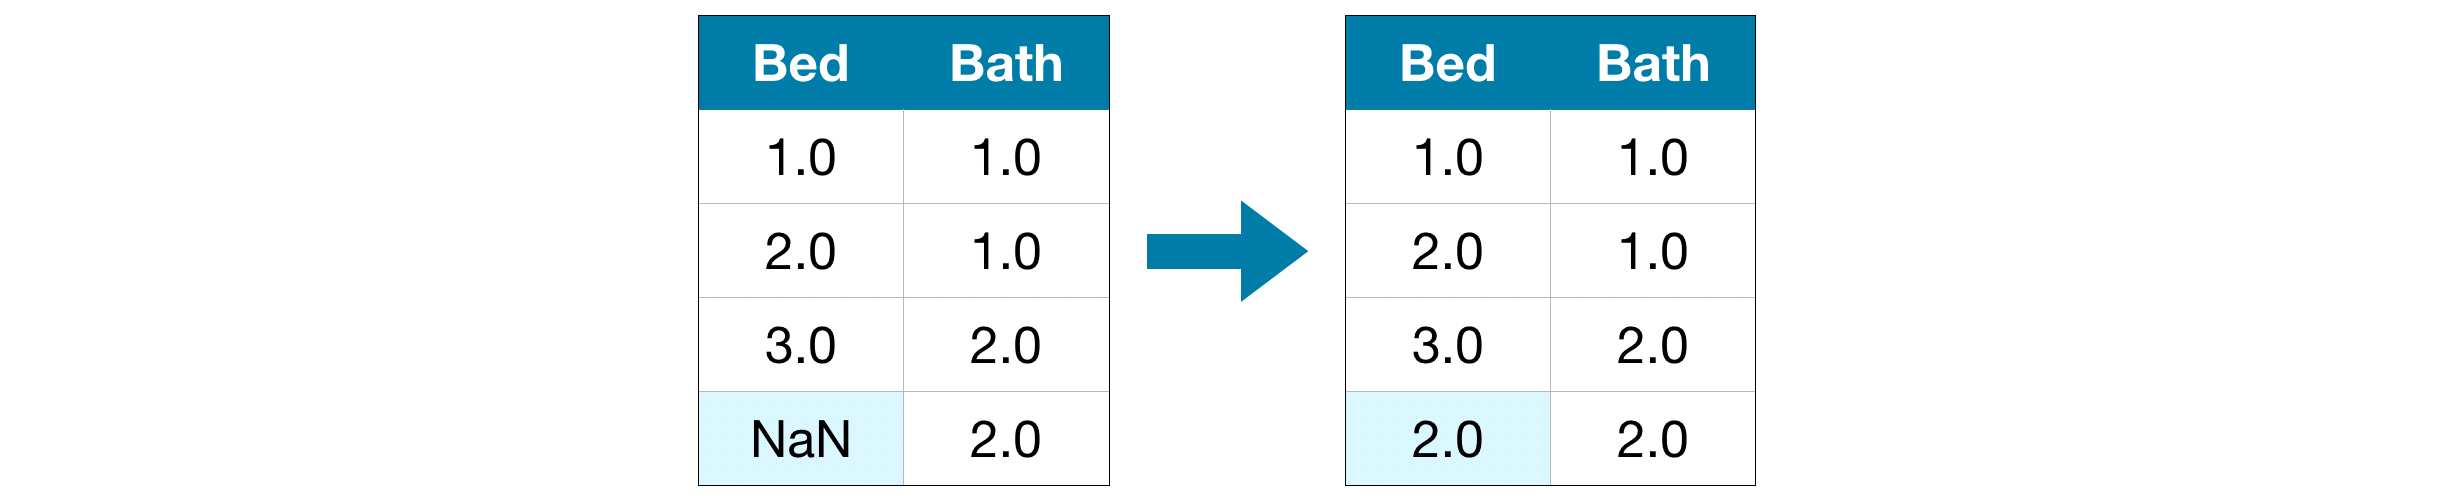

The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

- An Extension To Imputation

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.

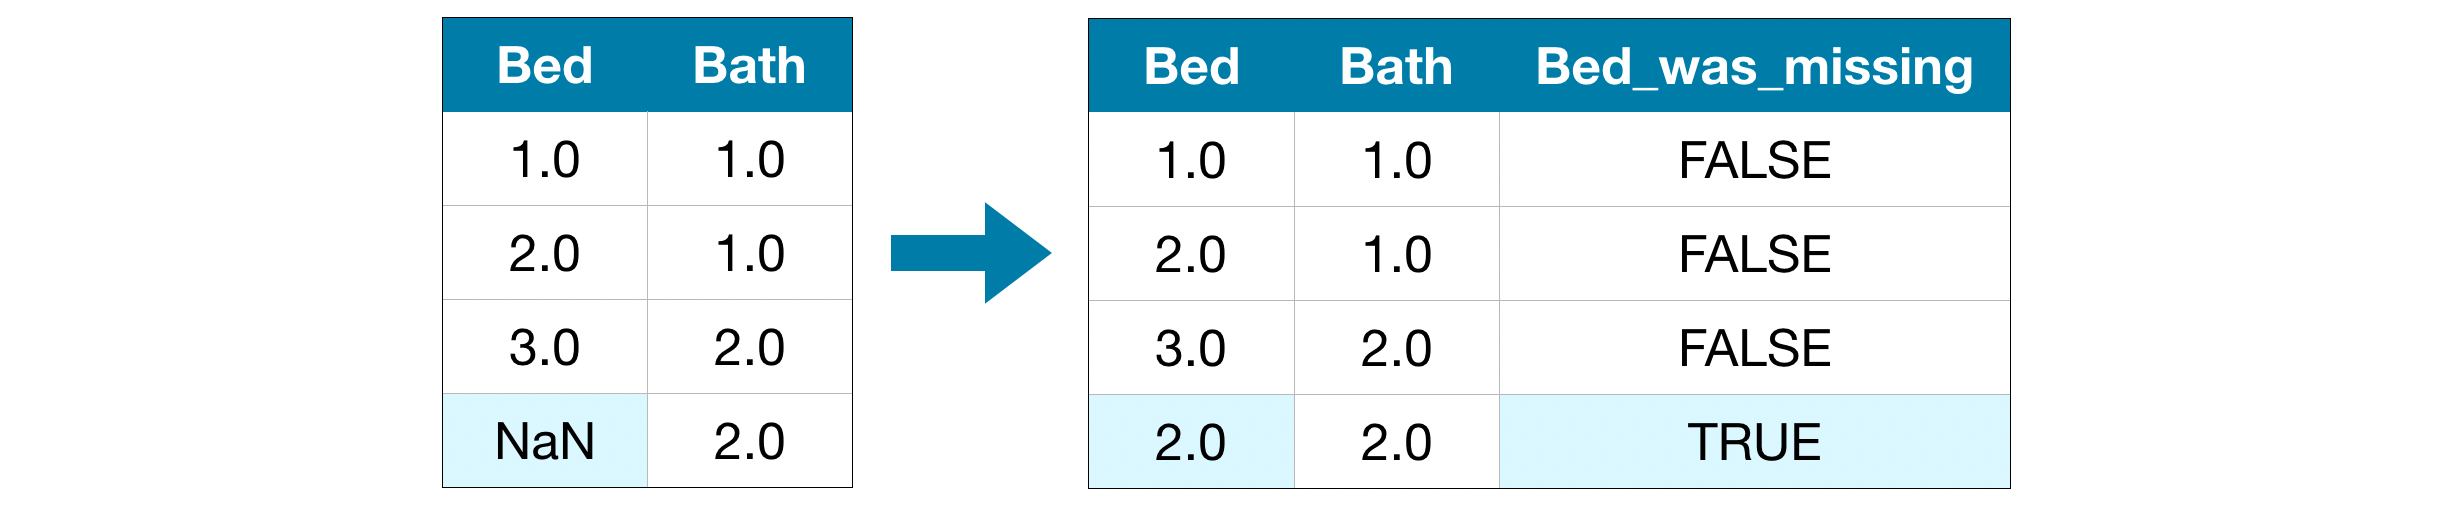

In this approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries.

In some cases, this will meaningfully improve results. In other cases, it doesn't help at all.

### Example
In the example, we will work with the `Melbourne Housing dataset`. Our model will use information such as the number of rooms and land size to predict home price.

We won't focus on the data loading step. Instead, you can imagine you are at a point where you already have the training and validation data in `X_train, X_test, y_train, and y_test.`

In [2]:
mel_train = pd.read_csv("melbourne_home_data.csv")
mel_train.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
feats =['Rooms','Bathroom','Landsize', 'Lattitude','BuildingArea','Longtitude']
mX = mel_train[feats]

my = mel_train.Price

In [9]:
mX_train, mX_test, my_train, my_test = train_test_split(mX, my, train_size=0.7, test_size=0.3, random_state=42)

## Define Function to Measure Quality of Each Approach

We define a function **score_dataset()**  to compare different approaches to dealing with missing values. This function reports the mean absolute error (MAE) from a random forest model.

In [13]:
def score_dataset(mX_train,mX_test,my_train,my_test):
    model = RandomForestRegressor(n_estimators=70, random_state=42)
    model.fit(mX_train, my_train)
    preds = model.predict(mX_test)
    return mean_absolute_error(my_test, preds)

### Score from Approach 1 (Drop Columns with Missing Values)
Since we are working with both training and validation sets, we are careful to drop the same columns in both DataFrames.

In [14]:
# Get names of columns with missing values
cols_with_missing = [col for col in mX_train.columns
                     if mX_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = mX_train.drop(cols_with_missing, axis=1)
reduced_X_test = mX_test.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_test, my_train, my_test))

MAE from Approach 1 (Drop columns with missing values):
181079.8056766153


### Score from Approach 2 (Imputation)
Next, we use `SimpleImputer` to replace missing values with the mean value along each column.

Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset). While statisticians have experimented with more complex ways to determine imputed values (such as **regression imputation**, for instance), the complex strategies typically give no additional benefit once you plug the results into sophisticated machine learning models.

In [15]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(mX_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(mX_test))

# Imputation removed column names; put them back
imputed_X_train.columns = mX_train.columns
imputed_X_valid.columns = mX_test.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, my_train, my_test))

MAE from Approach 2 (Imputation):
177027.43115912867


We see that **Approach 2** has lower MAE than **Approach 1**, so **Approach 2** performed better on this dataset.

**Score from Approach 3 (An Extension to Imputation)** 

Next, we impute the missing values, while also keeping track of which values were imputed.

In [16]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = mX_train.copy()
X_valid_plus = mX_test.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, my_train, my_test))

MAE from Approach 3 (An Extension to Imputation):
177329.40182001455


As we can see, **Approach 3** performed slightly worse than **Approach 2**.

So, why did imputation perform better than dropping the columns?

The training data has 10864 rows and 12 columns, where three columns contain missing data. For each column, less than half of the entries are missing. Thus, dropping the columns removes a lot of useful information, and so it makes sense that imputation would perform better.

In [17]:
# Shape of training data (num_rows, num_columns)
print(mX_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (mX_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(9506, 6)
BuildingArea    4515
dtype: int64


## Conclusion
As is common, imputing missing values (in Approach 2 and Approach 3) yielded better results, relative to when we simply dropped columns with missing values (in Approach 1).

# Exercise 

We will be doing further work on the Iowa Housing Prices we started to see whether our new skills will help reduce our error and improve our position on the leadership board.

In [2]:
# Read the data
iowa_train=pd.read_csv("Iowa_home_train.csv", index_col="Id")
iowa_test=pd.read_csv("Iowa_home_test.csv", index_col ="Id")

#Remove rows with missing target, separate target from predictors
iowa_train.dropna(axis=0, subset=['SalePrice'], inplace=True)
iy=iowa_train.SalePrice
iowa_train.drop(['SalePrice'], axis=1, inplace=True)


# To keep things simple, we'll use only numerical predictors
iX = iowa_train.select_dtypes(exclude=['object'])
itest = iowa_test.select_dtypes(exclude=['object'])

In [3]:
iX_train, iX_test, iy_train, iy_test = train_test_split(iX,iy, train_size=0.7, test_size=0.3, random_state=42)

In [4]:
iX_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
136,20,80.0,10400,7,6,1970,1970,288.0,0,0,...,530,98,0,0,0,0,0,0,5,2008
1453,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,525,0,28,0,0,0,0,0,5,2006
763,60,72.0,8640,7,5,2009,2009,0.0,24,0,...,614,169,45,0,0,0,0,0,6,2010
933,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,788,0,191,0,0,0,0,0,3,2007
436,60,43.0,10667,7,6,1996,1996,0.0,385,344,...,550,158,61,0,0,0,0,0,4,2009


You can already see a few missing values in the first several rows. In the next step, you'll obtain a more comprehensive understanding of the missing values in the dataset.

# Step 1 - Preliminary Investigation

In [5]:
# Shape of training data (num_rows, num_columns)
print(iX_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (iX_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1021, 36)
LotFrontage    190
MasVnrArea       3
GarageYrBlt     54
dtype: int64


# Step 2: Drop columns with missing values

In this step, you'll preprocess the data in `iX_train` and `iX_test` to remove columns with missing values.  Set the preprocessed DataFrames to `reduced_X_train` and `reduced_X_valid`, respectively.  

In [6]:
#define my dataset rater - a function to score the mae for my various diff forms of data
def rate_my_data(iX_train, iX_test, iy_train, iy_test):
    model = RandomForestRegressor(n_estimators=70, random_state=42)
    model.fit(iX_train, iy_train)
    ipred = model.predict(iX_test)
    return mean_absolute_error(ipred, iy_test)

In [7]:
#list all the columns with any missing values
cols_missing = [col for col in iX_train.columns if iX_train[col].isnull().any()]

reduced_X_train = iX_train.drop(cols_missing, axis=1)
reduced_y_test = iX_test.drop(cols_missing, axis=1)

print("the Mae of the 1st Approach (dropping missing values):")
print(rate_my_data(reduced_X_train, reduced_y_test, iy_train, iy_test))

the Mae of the 1st Approach (dropping missing values):
16980.93469232442


# Step 3: Imputation

### Part A

Use the next code cell to impute missing values with the mean value along each column.  Set the preprocessed DataFrames to `imputed_X_train` and `imputed_X_valid`.  Make sure that the column names match those in `iX_train` and `iX_test`.

In [8]:
# instantiate imputer and transform the missing columns
imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(imputer.fit_transform(iX_train))
imputed_X_test = pd.DataFrame(imputer.transform(iX_test))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = iX_train.columns
imputed_X_test.columns = iX_test.columns

print("the Mae of 2nd Approach (1st Imputation technique):")
print(rate_my_data(imputed_X_train, imputed_X_test, iy_train, iy_test))

the Mae of 2nd Approach (1st Imputation technique):
17239.22882148293


### Note
Given that thre are so few missing values in the dataset, we'd expect imputation to perform better than dropping columns entirely. However, we can sometimes see that dropping columns performs slightly better! While this can probably partially be attributed to noise in the dataset, another potential explanation is that the imputation method is not a great match to this dataset. That is, maybe instead of filling in the mean value, it makes more sense to set every missing value to a value of 0, to fill in the most frequently encountered value, or to use some other method. For instance, consider the GarageYrBlt column (which indicates the year that the garage was built). It's likely that in some cases, a missing value could indicate a house that does not have a garage. Does it make more sense to fill in the median value along each column in this case? Or could we get better results by filling in the minimum value along each column? It's not quite clear what's best in this case, but perhaps we can rule out some options immediately - for instance, setting missing values in this column to 0 is likely to yield horrible results!

# Step 4: Generate test predictions

In this final step, you'll use any approach of your choosing to deal with missing values.  Once you've preprocessed the training and validation features, you'll train and evaluate a random forest model.  Then, you'll preprocess the test data before generating predictions that can be submitted to the competition!

### Part A

Use the next code cell to preprocess the training and validation data.  Set the preprocessed DataFrames to `final_X_train` and `final_X_valid`.  **You can use any approach of your choosing here!**  in order for this step to be marked as correct, you need only ensure:
- the preprocessed DataFrames have the same number of columns,
- the preprocessed DataFrames have no missing values, 
- `final_X_train` and `y_train` have the same number of rows, and
- `final_X_valid` and `y_test` have the same number of rows.

In [9]:
# Preprocessed training and validation features
final_X_train = iX_train.drop(cols_missing, axis=1)
final_X_valid = iX_test.drop(cols_missing, axis=1)


# Define and fit model
model = RandomForestRegressor(n_estimators=70, random_state=42)
model.fit(final_X_train, iy_train)

# Get validation predictions and MAE
preds_valid = model.predict(final_X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(iy_test, preds_valid))

MAE (Your approach):
16980.93469232442


In [10]:
# Fill in the line below: preprocess test data
itest = itest.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
final_imputer = SimpleImputer()
final_X_test = pd.DataFrame(final_imputer.fit_transform(itest))

# Fill in the line below: get test predictions
preds_test = model.predict(final_X_test)

In [11]:
# Save test predictions to file
output = pd.DataFrame({'Id': itest.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Categorical Variables - Introduction

A categorical variable takes only a limited number of values.

- Consider a survey that asks how often you eat breakfast and provides four options: "Never", "Rarely", "Most days", or "Every day". In this case, the data is categorical, because responses fall into a fixed set of categories.
- If people responded to a survey about which what brand of car they owned, the responses would fall into categories like "Honda", "Toyota", and "Ford". In this case, the data is also categorical.

You will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first. In this tutorial, we'll compare three approaches that you can use to prepare your categorical data.

## Three Approaches

- 1) Drop Categorical Variables
The easiest approach to dealing with categorical variables is to simply remove them from the dataset. This approach will only work well if the columns did not contain useful information.


- 2) Label Encoding
Label encoding assigns each unique value to a different integer.
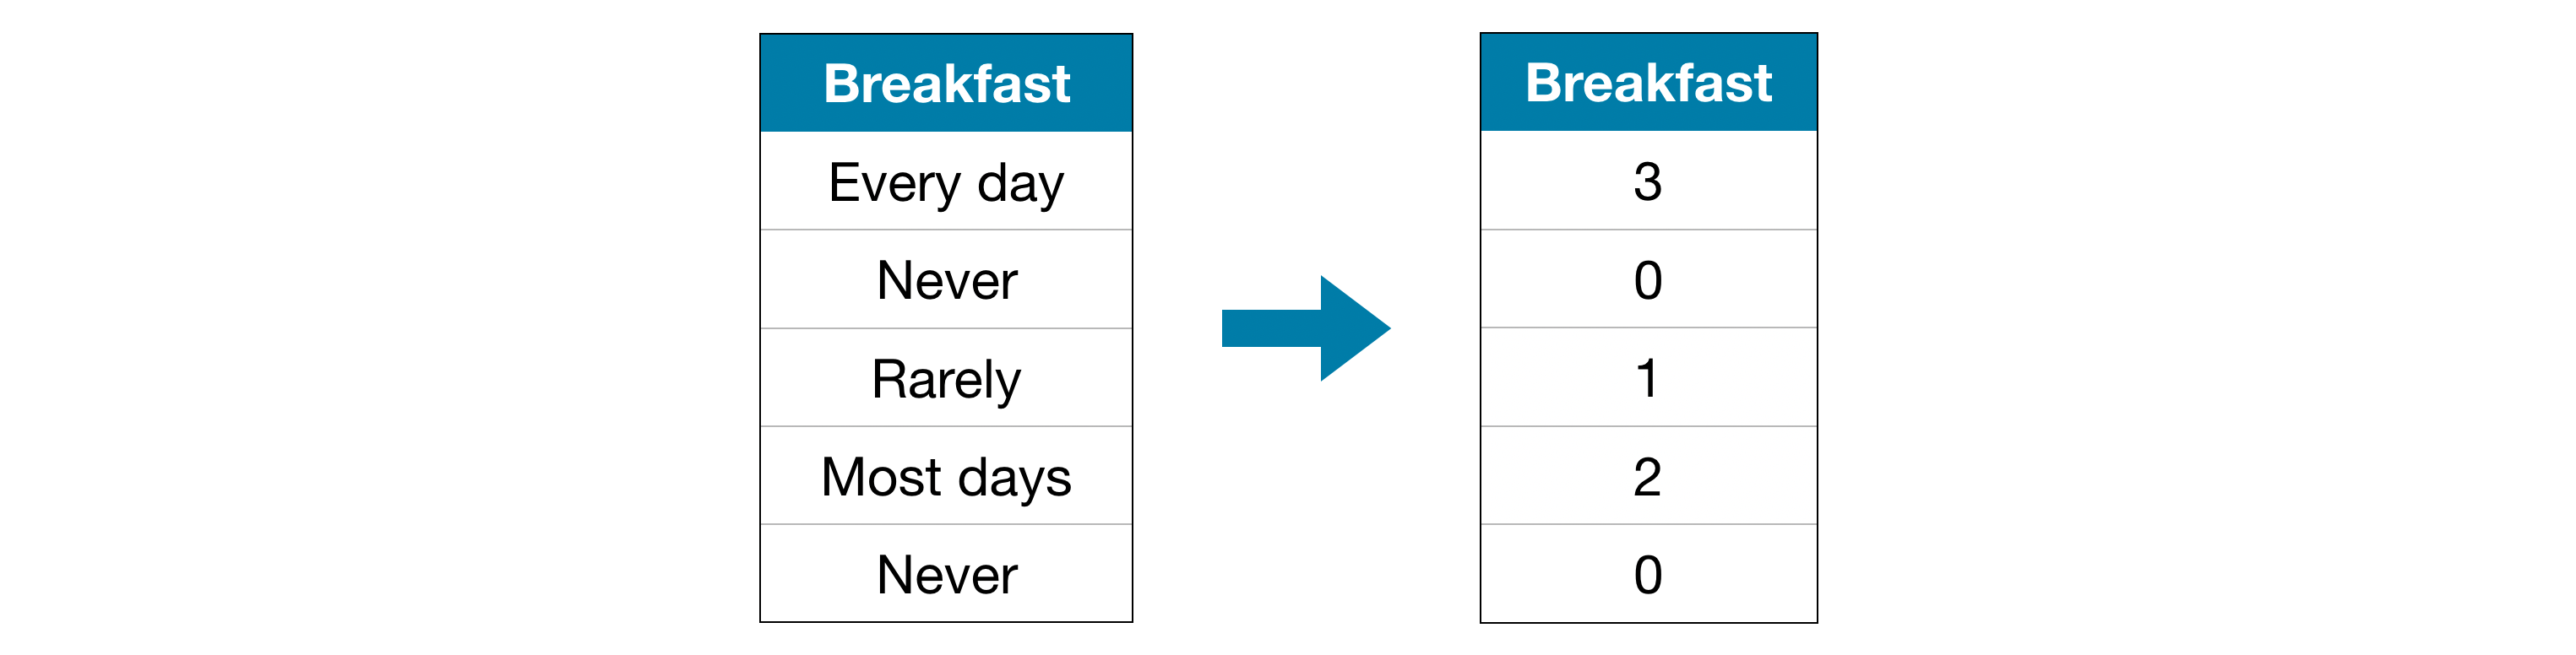

This approach assumes an ordering of the categories: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).

This assumption makes sense in this example, because there is an indisputable ranking to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect label encoding to work well with **ordinal variables**.

- 3) One-Hot Encoding
One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. To understand this, we'll work through an example.
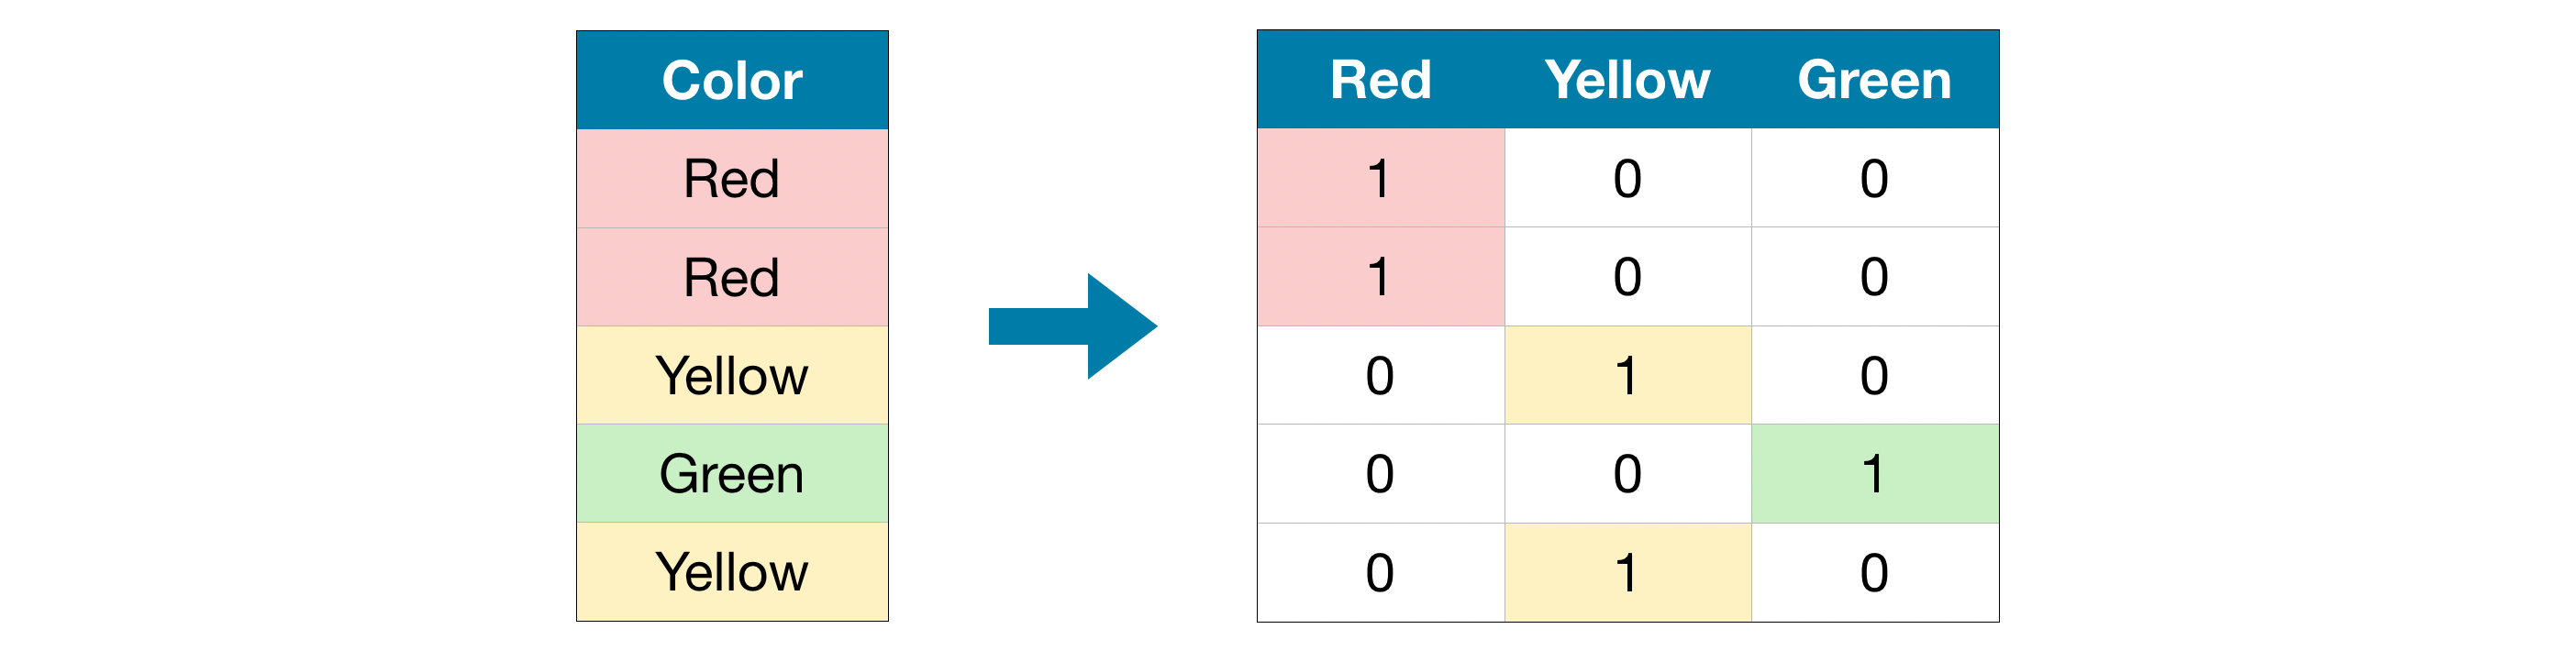

In the original dataset, "Color" is a categorical variable with three categories: "Red", "Yellow", and "Green". The corresponding one-hot encoding contains one column for each possible value, and one row for each row in the original dataset. Wherever the original value was "Red", we put a 1 in the "Red" column; if the original value was "Yellow", we put a 1 in the "Yellow" column, and so on.

In contrast to label encoding, one-hot encoding does not assume an ordering of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., "Red" is neither more nor less than "Yellow"). We refer to categorical variables without an intrinsic ranking as **nominal variables**.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values).

As in the previous tutorial, we will work with the Melbourne Housing dataset.

We won't focus on the data loading step. Instead, you can imagine you are at a point where you already have the training and validation data in X_train, X_test, y_train, and y_test.

We take a peek at the training data with the head() method below.

In [2]:
melbourne = pd.read_csv("melbourne_home_data.csv")
melbourne.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Next, we obtain a list of all of the categorical variables in the training data.

We do this by checking the data type (or **dtype**) of each column. The object dtype indicates a column has text (there are other things it could theoretically be, but that's unimportant for our purposes). For this dataset, the columns with text indicate categorical variables.

In [7]:
feats = ['Type', 'Method','Regionname','Rooms','Distance','Postcode','Bedroom2','Propertycount','Bathroom','Landsize','Longtitude','Lattitude']
melbourne_train = melbourne[feats]
melbourne_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Propertycount,Bathroom,Landsize,Longtitude,Lattitude
0,h,S,Northern Metropolitan,2,2.5,3067.0,2.0,4019.0,1.0,202.0,144.9984,-37.7996
1,h,S,Northern Metropolitan,2,2.5,3067.0,2.0,4019.0,1.0,156.0,144.9934,-37.8079
2,h,SP,Northern Metropolitan,3,2.5,3067.0,3.0,4019.0,2.0,134.0,144.9944,-37.8093
3,h,PI,Northern Metropolitan,3,2.5,3067.0,3.0,4019.0,2.0,94.0,144.9969,-37.7969
4,h,VB,Northern Metropolitan,4,2.5,3067.0,3.0,4019.0,1.0,120.0,144.9941,-37.8072


In [17]:
X = melbourne_train
y= melbourne.Price

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.3, random_state=42)

In [12]:
train_X.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Propertycount,Bathroom,Landsize,Longtitude,Lattitude
623,h,S,Southern Metropolitan,4,9.2,3104.0,4.0,7809.0,3.0,1070.0,145.07160,-37.79750
9803,h,PI,Eastern Metropolitan,6,10.9,3128.0,6.0,4605.0,3.0,786.0,145.12748,-37.82616
762,h,S,Southern Metropolitan,4,13.0,3204.0,4.0,6795.0,2.0,611.0,145.04810,-37.92890
13015,h,S,Southern Metropolitan,3,7.3,3102.0,3.0,2671.0,2.0,664.0,145.04595,-37.79639
4556,h,S,South-Eastern Metropolitan,3,14.7,3167.0,3.0,3692.0,1.0,743.0,145.09400,-37.91290


**Next, we obtain a list of all of the categorical variables in the training data.**

We do this by checking the data type (or **dtype**) of each column. The object dtype indicates a column has text (there are other things it could theoretically be, but that's unimportant for our purposes). For this dataset, the columns with text indicate categorical variables.

In [13]:
# Get list of categorical variables
s = (train_X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Type', 'Method', 'Regionname']


## Define Function to Measure Quality of Each Approach
We define a function score_dataset() to compare the three different approaches to dealing with categorical variables. This function reports the mean absolute error (MAE) from a random forest model. In general, we want the MAE to be as low as possible!

In [14]:
def score_my_dataset(train_X, test_X, train_y, test_y):
    model = RandomForestRegressor(n_estimators=70, random_state=42)
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    return mean_absolute_error(test_y, preds)

## Score from Approach 1 (Drop Categorical Variables)
We drop the `object` columns with the `select_dtypes()` method.

In [19]:
drop_X_train = train_X.select_dtypes(exclude=['object'])
drop_X_valid = test_X.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_my_dataset(drop_X_train, drop_X_valid, train_y, test_y))

MAE from Approach 1 (Drop categorical variables):
185174.8786545006


**Score from Approach 2 (Label Encoding)**

Scikit-learn has a `LabelEncoder` class that can be used to get label encodings. We loop over the categorical variables and apply the label encoder separately to each column.

In [24]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = train_X.copy()
label_X_valid = test_X.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(train_X[col])
    label_X_valid[col] = label_encoder.transform(test_X[col])

print("MAE from Approach 2 (Label Encoding):") 
print(score_my_dataset(label_X_train, label_X_valid, train_y, test_y))

MAE from Approach 2 (Label Encoding):
173844.15355720752


In the code cell above, for each column, we randomly assign each unique value to a different integer. This is a common approach that is simpler than providing custom labels; however, we can expect an additional boost in performance if we provide better-informed labels for all ordinal variables.

## Score from Approach 3 (One-Hot Encoding)

We use the `OneHotEncoder` class from scikit-learn to get one-hot encodings. There are a number of parameters that can be used to customize its behavior.

- We set `handle_unknown='ignore'` to avoid errors when the validation data contains classes that aren't represented in the training data, and
- setting `sparse=False` ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).

To use the encoder, we supply only the categorical columns that we want to be one-hot encoded. For instance, to encode the training data, we supply `train_X[object_cols]`. (`object_cols` in the code cell below is a list of the column names with categorical data, and so `train_X[object_cols]` contains all of the categorical data in the training set.)

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(test_X[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_valid.index = test_X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_X.drop(object_cols, axis=1)
num_X_valid = test_X.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_my_dataset(OH_X_train, OH_X_valid, train_y, test_y))

MAE from Approach 3 (One-Hot Encoding):
174394.1011372934


## Which approach is best?

In this case, dropping the categorical columns (**Approach 1**) performed worst, since it had the highest MAE score. As for the other two approaches, since the returned MAE scores are so close in value, there doesn't appear to be any meaningful benefit to one over the other.

In general, one-hot encoding (**Approach 3**) will typically perform best, and dropping the categorical columns (**Approach 1**) typically performs worst, but it varies on a case-by-case basis.

## Conclusion
The world is filled with categorical data. You will be a much more effective data scientist if you know how to use this common data type!